In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet
%matplotlib inline
import datetime
import warnings

Importing plotly failed. Interactive plots will not work.


In [2]:
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Sales Dataset 2020.csv')
data.head()

,ID,Item No.,May-17,Jun-17,Jul-17,Aug-17,Sep-17,Oct-17,Nov-17,Dec-17,...,Q3-2019,Q4-2019,Q1-2020,Q2-2020,Year-2017,Year-2018,Year-2019,Year-2020,Total Sales,Category
0,2613,10697,1081.0,150,4013,2251,4059,6176,2744.0,2667,...,5361.0,5060.0,2647.0,2826.0,23141.0,32835.0,17433.0,5473.0,78882.0,1
1,4264,14300,67.0,11,42,31,90,107,23.0,80,...,138.0,205.0,116.0,141.0,451.0,727.0,527.0,257.0,1962.0,0
2,2747,10922,2.0,0,1,8,19,20,34.0,36,...,45.0,41.0,24.0,9.0,120.0,374.0,200.0,33.0,727.0,0
3,2746,10921,2.0,2,3,2,5,2,6.0,3,...,11.0,11.0,5.0,3.0,25.0,70.0,47.0,8.0,150.0,0
4,3439,12497,1.0,6,102,0,0,0,-2.0,337,...,1058.0,188.0,104.0,15.0,444.0,339.0,1474.0,119.0,2376.0,0


In [4]:
#df2 = df1.set_index("State", drop = False)
df=data.set_index('ID',drop= True)
df

,Item No.,May-17,Jun-17,Jul-17,Aug-17,Sep-17,Oct-17,Nov-17,Dec-17,Jan-18,...,Q3-2019,Q4-2019,Q1-2020,Q2-2020,Year-2017,Year-2018,Year-2019,Year-2020,Total Sales,Category
ID,,,,,,,,,,,,,,,,,,,,,
2613,10697,1081.0,150,4013,2251,4059,6176,2744.0,2667,2668,...,5361.0,5060.0,2647.0,2826.0,23141.0,32835.0,17433.0,5473.0,78882.0,1
4264,14300,67.0,11,42,31,90,107,23.0,80,29,...,138.0,205.0,116.0,141.0,451.0,727.0,527.0,257.0,1962.0,0
2747,10922,2.0,0,1,8,19,20,34.0,36,24,...,45.0,41.0,24.0,9.0,120.0,374.0,200.0,33.0,727.0,0
2746,10921,2.0,2,3,2,5,2,6.0,3,6,...,11.0,11.0,5.0,3.0,25.0,70.0,47.0,8.0,150.0,0
3439,12497,1.0,6,102,0,0,0,-2.0,337,16,...,1058.0,188.0,104.0,15.0,444.0,339.0,1474.0,119.0,2376.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,1429,0.0,0,0,0,0,0,0.0,0,0,...,6.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,6.0,0
584,1430,2.0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0
585,1431,0.0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,5.0,0


In [5]:
df1=df.copy()
df1.drop(df1.iloc[:,38:],axis=1,inplace=True)
df1.head()

,Item No.,May-17,Jun-17,Jul-17,Aug-17,Sep-17,Oct-17,Nov-17,Dec-17,Jan-18,...,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20,Apr-20,May-20
ID,,,,,,,,,,,,,,,,,,,,,
2613,10697,1081.0,150,4013,2251,4059,6176,2744.0,2667,2668,...,1942,708.0,1224.0,2101.0,1735.0,1500.0,380.0,767.0,2000.0,826
4264,14300,67.0,11,42,31,90,107,23.0,80,29,...,15,40.0,110.0,35.0,60.0,42.0,11.0,63.0,120.0,21
2747,10922,2.0,0,1,8,19,20,34.0,36,24,...,12,21.0,12.0,13.0,16.0,11.0,7.0,6.0,7.0,2
2746,10921,2.0,2,3,2,5,2,6.0,3,6,...,1,3.0,5.0,6.0,0.0,2.0,3.0,0.0,2.0,1
3439,12497,1.0,6,102,0,0,0,-2.0,337,16,...,23,65.0,16.0,110.0,62.0,9.0,87.0,8.0,14.0,1


In [6]:
months_list=df.iloc[:,2:38].columns
#months_list

#  1.Forecasting based on ID

-Enter the ID number & extract the monthly sales(May-17 to May-20) of that respective ID number & make prediction of the same for another one more year (i.e.., till May-2021)

In [24]:
#df2.loc[startrow:endrow, startcolumn:endcolumn]
#Extracting the respective row of the ID number
n=int(input())
ID_monthly_sales_list=(df1.loc[n:n,'May-17':].values.T.flatten())
y=ID_monthly_sales_list.tolist()
#y

2613


In [8]:
from fbprophet import Prophet

In [9]:
# Initialize the Model
model=Prophet()

In [10]:
def custom_parser(x):
    return datetime.datetime.strptime(x,'%b-%y')


date_lst=[]
for i in range(len(months_list)):
    date_lst.append(custom_parser(months_list[i]))
#date_lst

In [11]:
#Framing new dataframe with months & monthly sales values of the respective ID
new_dataframe=pd.DataFrame(list(zip(date_lst,y)),columns=['ds','y'])
new_dataframe.head()

,ds,y
0,2017-06-01,1081.0
1,2017-07-01,150.0
2,2017-08-01,4013.0
3,2017-09-01,2251.0
4,2017-10-01,4059.0


In [12]:
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      36 non-null     datetime64[ns]
 1   y       36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [13]:
model.fit(new_dataframe)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [15]:
future_dates.tail()


,ds
396,2021-04-27
397,2021-04-28
398,2021-04-29
399,2021-04-30
400,2021-05-01


In [16]:
prediction=model.predict(future_dates)

In [17]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-06-01,3505.896466,1664.765456,3740.694239,3505.896466,3505.896466,-802.075163,-802.075163,-802.075163,-802.075163,-802.075163,-802.075163,0.0,0.0,0.0,2703.821304
1,2017-07-01,3426.769744,2.280224,2213.726009,3426.769744,3426.769744,-2284.682513,-2284.682513,-2284.682513,-2284.682513,-2284.682513,-2284.682513,0.0,0.0,0.0,1142.087231
2,2017-08-01,3345.005464,4027.429315,6226.266670,3345.005464,3345.005464,1783.131981,1783.131981,1783.131981,1783.131981,1783.131981,1783.131981,0.0,0.0,0.0,5128.137445
3,2017-09-01,3263.241184,1081.671211,3234.102628,3263.241184,3263.241184,-1106.709070,-1106.709070,-1106.709070,-1106.709070,-1106.709070,-1106.709070,0.0,0.0,0.0,2156.532114
4,2017-10-01,3184.114461,3114.527185,5203.062949,3184.114461,3184.114461,991.037042,991.037042,991.037042,991.037042,991.037042,991.037042,0.0,0.0,0.0,4175.151503


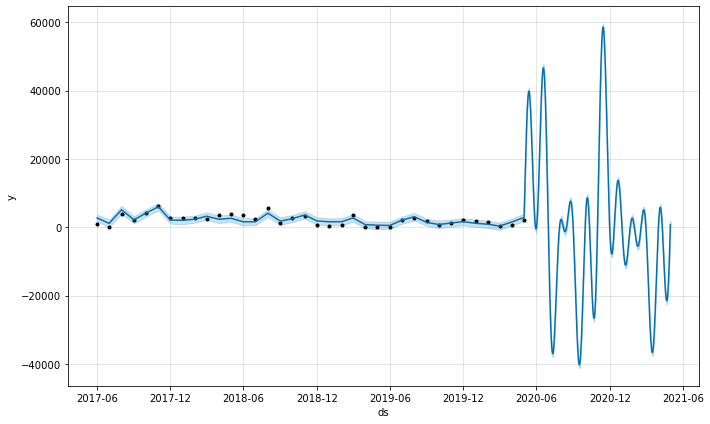

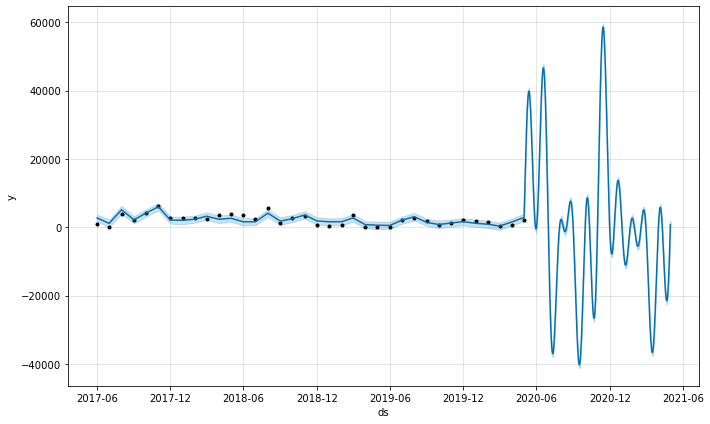

In [26]:
### plot the predicted projection
model.plot(prediction)
#Note:The black dots are actual datapoints

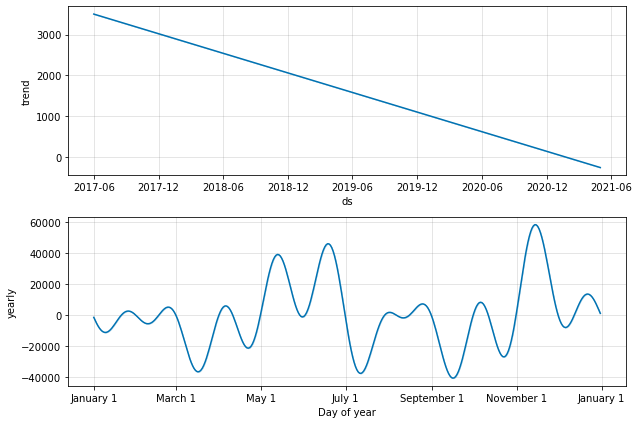

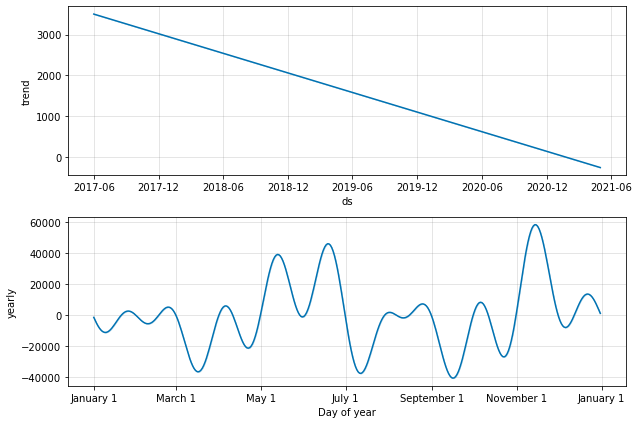

In [19]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [20]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='630 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-05-02 00:00:00 and 2019-05-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-06-01,4056.001507,3374.851586,4784.340823,204.0,2019-05-02
1,2019-07-01,2480.593462,1768.649876,3154.949392,2205.0,2019-05-02
2,2019-08-01,5235.688968,4559.884255,5916.957323,2711.0,2019-05-02
3,2019-09-01,-999.356751,-1695.490502,-338.987277,1942.0,2019-05-02
4,2019-10-01,1221.768935,499.107969,1905.350254,708.0,2019-05-02


In [21]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,30 days,1.483792e+07,3852.001507,3852.001507,18.882360,18.882360,0.0
1,60 days,7.595176e+04,275.593462,275.593462,0.124986,0.124986,1.0
2,91 days,6.374054e+06,2524.688968,2524.688968,0.931276,0.931276,0.0
3,122 days,8.651580e+06,2941.356751,2941.356751,1.514602,1.514602,0.0
4,152 days,2.639585e+05,513.768935,513.768935,0.725662,0.725662,1.0


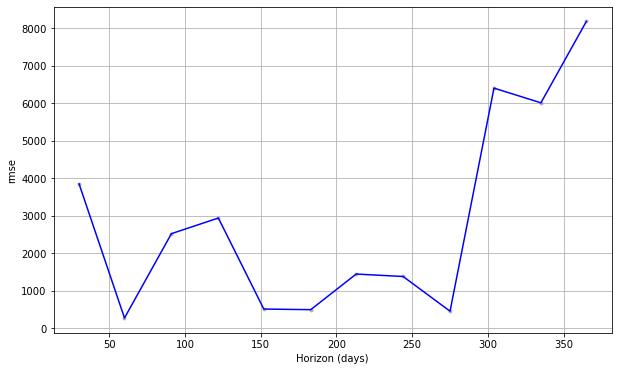

In [22]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

# 2.Yearly Sales of all item's in the company

In [30]:
df

,Item No.,May-17,Jun-17,Jul-17,Aug-17,Sep-17,Oct-17,Nov-17,Dec-17,Jan-18,...,Q3-2019,Q4-2019,Q1-2020,Q2-2020,Year-2017,Year-2018,Year-2019,Year-2020,Total Sales,Category
ID,,,,,,,,,,,,,,,,,,,,,
2613,10697,1081.0,150,4013,2251,4059,6176,2744.0,2667,2668,...,5361.0,5060.0,2647.0,2826.0,23141.0,32835.0,17433.0,5473.0,78882.0,1
4264,14300,67.0,11,42,31,90,107,23.0,80,29,...,138.0,205.0,116.0,141.0,451.0,727.0,527.0,257.0,1962.0,0
2747,10922,2.0,0,1,8,19,20,34.0,36,24,...,45.0,41.0,24.0,9.0,120.0,374.0,200.0,33.0,727.0,0
2746,10921,2.0,2,3,2,5,2,6.0,3,6,...,11.0,11.0,5.0,3.0,25.0,70.0,47.0,8.0,150.0,0
3439,12497,1.0,6,102,0,0,0,-2.0,337,16,...,1058.0,188.0,104.0,15.0,444.0,339.0,1474.0,119.0,2376.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,1429,0.0,0,0,0,0,0,0.0,0,0,...,6.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,6.0,0
584,1430,2.0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0
585,1431,0.0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,5.0,0


In [54]:
#getting the sum of total number of products sold for all month column
s1=list(data.iloc[:,2:39].sum(axis = 0))
s1

[20876.5,
 17675.0,
 34743.0,
 32326.0,
 16297.0,
 20217.0,
 38020.4,
 17452.0,
 15904.0,
 17729.0,
 9029.75,
 10062.0,
 16910.2,
 12725.779999999999,
 45978.42,
 22156.11,
 50713.869999999995,
 54146.74,
 48424.66,
 40981.99,
 18587.98,
 13630.9,
 20911.800000000003,
 13489.700000000003,
 14783.140000000001,
 19242.43,
 17705.0,
 12235.0,
 20945.75,
 12666.56,
 10378.16,
 20558.01,
 20814.319999999996,
 24511.0,
 23418.629999999997,
 30517.29,
 2155.0]

In [55]:
def custom_parser(x):
    return datetime.datetime.strptime(x,'%b-%y')


date_lst=[]
for i in range(len(months_list)):
    date_lst.append(custom_parser(months_list[i]))
#date_lst

In [59]:
sales=pd.DataFrame(list(zip(date_lst,s1)),columns=['ds','y'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      36 non-null     datetime64[ns]
 1   y       36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [60]:
model=Prophet()

In [61]:
model.fit(sales)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [63]:
future_dates.tail()

,ds
396,2021-04-27
397,2021-04-28
398,2021-04-29
399,2021-04-30
400,2021-05-01


In [64]:
prediction=model.predict(future_dates)

In [65]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-06-01,31006.141740,5104.855134,28776.222695,31006.141740,31006.141740,-14074.224830,-14074.224830,-14074.224830,-14074.224830,-14074.224830,-14074.224830,0.0,0.0,0.0,16931.916910
1,2017-07-01,30782.453059,801.105492,24570.391951,30782.453059,30782.453059,-18245.293251,-18245.293251,-18245.293251,-18245.293251,-18245.293251,-18245.293251,0.0,0.0,0.0,12537.159809
2,2017-08-01,30551.308089,26800.845648,50332.000685,30551.308089,30551.308089,8117.121384,8117.121384,8117.121384,8117.121384,8117.121384,8117.121384,0.0,0.0,0.0,38668.429473
3,2017-09-01,30320.163119,18178.995688,41983.824233,30320.163119,30320.163119,-132.822904,-132.822904,-132.822904,-132.822904,-132.822904,-132.822904,0.0,0.0,0.0,30187.340215
4,2017-10-01,30096.474438,14608.004089,37300.940824,30096.474438,30096.474438,-4528.695123,-4528.695123,-4528.695123,-4528.695123,-4528.695123,-4528.695123,0.0,0.0,0.0,25567.779315


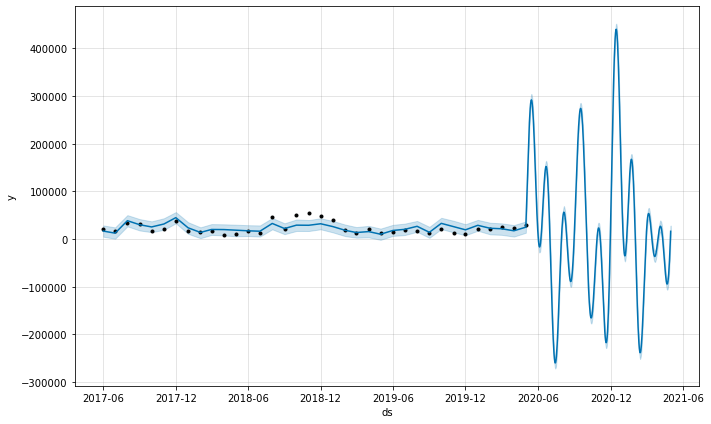

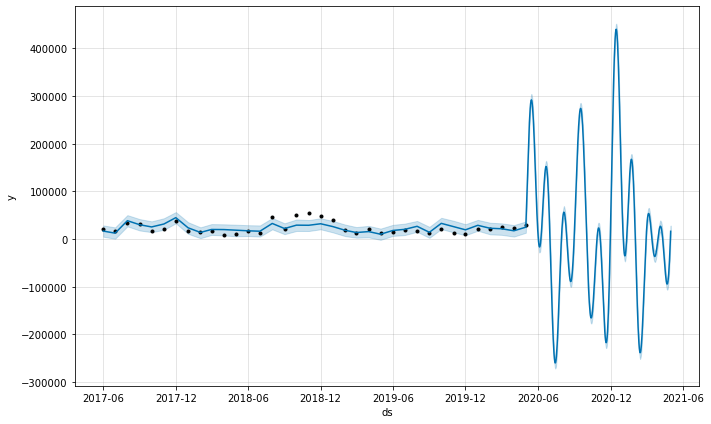

In [67]:
#Plot the model
model.plot(prediction)

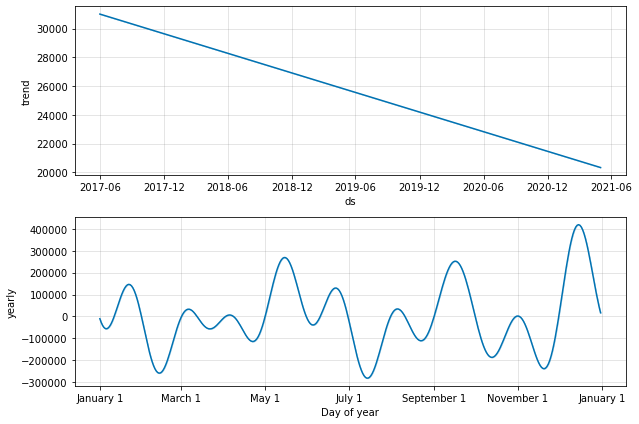

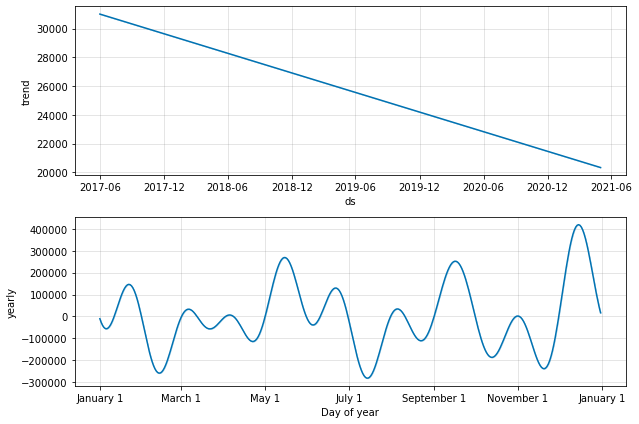

In [68]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [70]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='630 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-05-02 00:00:00 and 2019-05-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-06-01,29741.779242,24192.721100,35826.221079,14783.14,2019-05-02
1,2019-07-01,19574.679130,14090.983029,24950.569922,19242.43,2019-05-02
2,2019-08-01,60149.324194,54463.582260,65861.169783,17705.00,2019-05-02
3,2019-09-01,6929.281608,1350.255079,12664.471752,12235.00,2019-05-02
4,2019-10-01,71596.314895,66075.965568,77553.578685,20945.75,2019-05-02


In [71]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,30 days,2.237609e+08,14958.639242,14958.639242,1.011872,1.011872,0.0
1,60 days,1.103895e+05,332.249130,332.249130,0.017266,0.017266,1.0
2,91 days,1.801521e+09,42444.324194,42444.324194,2.397307,2.397307,0.0
3,122 days,2.815065e+07,5305.718392,5305.718392,0.433651,0.433651,1.0
4,152 days,2.565480e+09,50650.564895,50650.564895,2.418179,2.418179,0.0


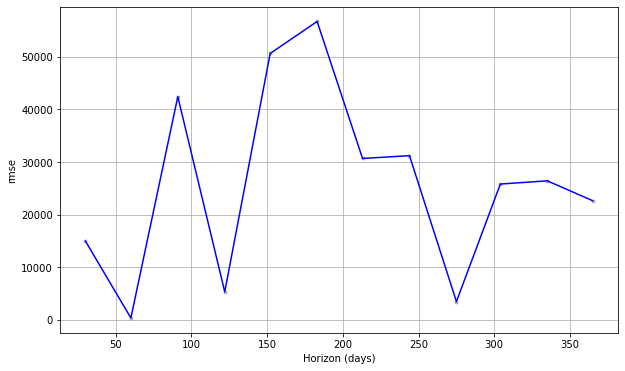

In [72]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')